通常来说，当你处理图像，文本，语音或者视频数据时，你可以使用标准 python 包将数据加载成 numpy 数组格式，然后将这个数组转换成 torch.*Tensor

* 对于图像，可以用 Pillow，OpenCV
* 对于语音，可以用 scipy，librosa
* 对于文本，可以直接用 Python 或 Cython 基础数据加载模块，或者用 NLTK 和 SpaCy

特别是对于视觉，我们已经创建了一个叫做 totchvision 的包，该包含有支持加载类似Imagenet，CIFAR10，MNIST 等公共数据集的数据加载模块 torchvision.datasets 和支持加载图像数据数据转换模块 torch.utils.data.DataLoader。

这提供了极大的便利，并且避免了编写“样板代码”。

对于本教程，我们将使用CIFAR10数据集，它包含十个类别：‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’。CIFAR-10 中的图像尺寸为33232，也就是RGB的3层颜色通道，每层通道内的尺寸为32*32。

![cifar-10](https://camo.githubusercontent.com/dc0ebc73740f797dafa55d37deaeead869ef31cd/687474703a2f2f7079746f7263686368696e612e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031382f31322f636966617231302e706e67)

![RUNOOB 图标](http://static.runoob.com/images/runoob-logo.png)

我们将按次序的做如下几步：

1. 使用torchvision加载并且归一化CIFAR10的训练和测试数据集
2. 定义一个卷积神经网络
3. 定义一个损失函数
4. 在训练样本数据上训练网络
5. 在测试样本数据上测试网络

加载并归一化 CIFAR10 使用 torchvision ,用它来加载 CIFAR10 数据非常简单。 

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

torchvision 数据集的输出是范围在[0,1]之间的 PILImage，我们将他们转换成归一化范围为[-1,1]之间的张量 Tensors。

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Using downloaded and verified file: ./data\cifar-10-python.tar.gz
Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


torch.Size([4, 3, 32, 32])
torch.Size([3, 36, 138])


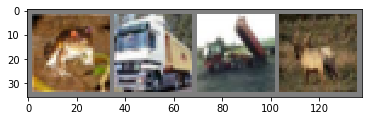

 frog truck truck  deer


In [18]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
#     np.transpose
#     >>> x = np.ones((1, 2, 3))
#     >>> np.transpose(x, (1, 0, 2)).shape
#     (2, 1, 3)
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.size())
print(torchvision.utils.make_grid(images).size())
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [60]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
#         三通道
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.fc1 = nn.Linear(64 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [45]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [61]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
start = time.time()
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
end = time.time()
print("run:" + str(end-start))

[1,  2000] loss: 2.093
[1,  4000] loss: 1.728
[1,  6000] loss: 1.540
[1,  8000] loss: 1.425
[1, 10000] loss: 1.392
[1, 12000] loss: 1.314
[2,  2000] loss: 1.234
[2,  4000] loss: 1.196
[2,  6000] loss: 1.139
[2,  8000] loss: 1.079
[2, 10000] loss: 1.083
[2, 12000] loss: 1.033
run:196.21602368354797


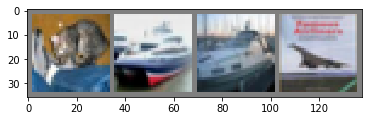

Truth:    cat  ship  ship plane


In [28]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('Truth: ', ' '.join('%5s' % classes[labels[j]]
                              for j in range(4)))

In [29]:
outputs = net(images)
_,predicted = torch.max(outputs,1)

In [32]:
outputs

tensor([[-0.5958, -1.5512,  0.5866,  2.3119, -0.2056,  0.8272,  0.5327, -0.1541,
          0.1546, -1.4530],
        [ 3.8857,  4.0572, -0.1618, -2.0627, -3.1304, -4.4639, -3.6012, -4.8770,
          7.8803,  2.6038],
        [ 1.0462,  1.8063,  0.1431, -0.2433, -1.1422, -1.7661, -1.7805, -1.7789,
          1.6148,  1.1925],
        [ 3.2331,  0.1364,  1.3733, -1.2051, -0.9038, -3.1349, -2.3216, -2.9365,
          3.7853, -0.0890]], grad_fn=<AddmmBackward>)

In [34]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [35]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 52 %
Accuracy of   car : 74 %
Accuracy of  bird : 31 %
Accuracy of   cat : 45 %
Accuracy of  deer : 43 %
Accuracy of   dog : 28 %
Accuracy of  frog : 67 %
Accuracy of horse : 78 %
Accuracy of  ship : 77 %
Accuracy of truck : 48 %


所以接下来呢？

我们怎么在GPU上跑这些神经网络？

在GPU上训练 就像你怎么把一个张量转移到GPU上一样，你要将神经网络转到GPU上。 如果CUDA可以用，让我们首先定义下我们的设备为第一个可见的cuda设备。

In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu" )
print(device)

cuda:0


本节剩余部分都会假定设备就是台CUDA设备。

接着这些方法会递归地遍历所有模块，并将它们的参数和缓冲器转换为CUDA张量。

In [37]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [62]:
import time
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
start = time.time()
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        images ,labels = data
        
        images, labels = images.to(device),labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
end = time.time()
print("run:" + str(end-start))

[1,  2000] loss: 2.105
[1,  4000] loss: 1.744
[1,  6000] loss: 1.548
[1,  8000] loss: 1.430
[1, 10000] loss: 1.411
[1, 12000] loss: 1.332
[2,  2000] loss: 1.260
[2,  4000] loss: 1.223
[2,  6000] loss: 1.146
[2,  8000] loss: 1.097
[2, 10000] loss: 1.098
[2, 12000] loss: 1.044
run:125.2021644115448
